## Model Training

### Importing necessary library

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#model
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso 
from sklearn.svm import SVR 
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error as MSE, mean_absolute_error as MAE, r2_score
# from catboost import CatBoostRegressor
# from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [5]:
data = pd.read_csv('fixed_GED.csv')
data

,Country,Year,exchange_rate,Population,Per_capita_GNI,Agriculture_hunting_forestry_fishing,Construction,Exports_of_goods_and_services,Final_consumption_expenditure,General_government_final_consumption_expenditure,...,Household_consumption_expenditure,Imports_of_goods_and_services,Manufacturing_index,Mining_Manufacturing_Utilities,Other_Activities,Total_Value_Added,Transport_storage_and_communication,Wholesale_retail_trade_restaurants_and_hotels,Gross_National_Income_in_USD,Gross_Domestic_Product
0,Afghanistan,1970,0.044998,10752971,164,8.699174e+08,4.679390e+07,1.656187e+08,1.663221e+09,1.121270e+08,...,1.551094e+09,1.952772e+08,3.701468e+08,3.766908e+08,1.277478e+08,1.731454e+09,8.391720e+07,2.263871e+08,1.766528e+09,1.731436e+09
1,Afghanistan,1971,0.044998,11015857,168,9.108281e+08,4.899411e+07,1.935803e+08,1.796541e+09,1.211148e+08,...,1.675426e+09,2.762965e+08,3.875495e+08,3.944012e+08,1.337541e+08,1.812857e+09,8.786038e+07,2.370192e+08,1.850122e+09,1.812838e+09
2,Afghanistan,1972,0.044998,11286753,149,8.279453e+08,4.453522e+07,2.276544e+08,1.607159e+09,1.083475e+08,...,1.498812e+09,2.903704e+08,3.522847e+08,3.585129e+08,1.215827e+08,1.647918e+09,7.986452e+07,2.154773e+08,1.683948e+09,1.647900e+09
3,Afghanistan,1973,0.044998,11575305,150,8.554869e+08,4.601854e+07,2.269136e+08,1.617037e+09,1.090135e+08,...,1.508024e+09,2.629629e+08,3.640103e+08,3.704458e+08,1.256302e+08,1.702735e+09,8.252888e+07,2.226243e+08,1.739998e+09,1.702716e+09
4,Afghanistan,1974,0.044998,11869879,177,1.035913e+09,5.572166e+07,2.849384e+08,1.907408e+09,1.285890e+08,...,1.778819e+09,3.056792e+08,4.407604e+08,4.485528e+08,1.521192e+08,2.061752e+09,9.991860e+07,2.695259e+08,2.106420e+09,2.061729e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10507,Zambia,2017,9.519501,17298054,1448,1.041005e+09,2.455717e+09,9.052008e+09,1.570240e+10,3.549314e+09,...,1.215309e+10,9.465895e+09,2.102369e+09,7.194153e+09,6.187124e+09,2.416662e+10,1.965026e+09,5.323590e+09,2.505604e+10,2.586816e+10
10508,Zambia,2018,10.458143,17835893,1451,8.791160e+08,2.516889e+09,9.987351e+09,1.517590e+10,3.343899e+09,...,1.183200e+10,9.717269e+09,1.801783e+09,6.556884e+09,5.791375e+09,2.422570e+10,2.490720e+09,5.990720e+09,2.588455e+10,2.631198e+10
10509,Zambia,2019,12.889418,18380477,1246,6.668385e+08,2.560457e+09,8.073600e+09,1.397026e+10,4.122149e+09,...,9.848112e+09,7.961415e+09,1.582484e+09,5.584425e+09,5.231062e+09,2.153971e+10,2.537646e+09,4.959277e+09,2.291011e+10,2.331036e+10
10510,Zambia,2020,18.344093,18927715,928,5.391694e+08,2.661361e+09,8.474000e+09,9.633640e+09,2.664373e+09,...,6.969267e+09,5.892353e+09,1.397303e+09,4.269405e+09,4.217431e+09,1.718020e+10,2.258715e+09,3.234123e+09,1.756233e+10,1.811064e+10


In [6]:
data.isna().sum()

Country                                             0
Year                                                0
exchange_rate                                       0
Population                                          0
Per_capita_GNI                                      0
Agriculture_hunting_forestry_fishing                0
Construction                                        0
Exports_of_goods_and_services                       0
Final_consumption_expenditure                       0
General_government_final_consumption_expenditure    0
Gross_capital_formation                             0
Gross_fixed_capital_formation                       0
Household_consumption_expenditure                   0
Imports_of_goods_and_services                       0
Manufacturing_index                                 0
Mining_Manufacturing_Utilities                      0
Other_Activities                                    0
Total_Value_Added                                   0
Transport_storage_and_commun

In [7]:
print(data.duplicated().sum())

0


In [8]:
col_2_encode = data["Country"]
# Perform one-hot encoding
encode_col = pd.get_dummies(col_2_encode, prefix='Country', dtype=int)

# Reset the index of the one-hot encoded DataFrame
encode_col = encode_col.reset_index(drop=True)

# Join the one-hot encoded columns to the original DataFrame
data = data.join(encode_col)

# Drop the original 'Country' column
data.drop(columns='Country', inplace=True)

# Display the resulting DataFrame
data.columns

Index(['Year', 'exchange_rate', 'Population', 'Per_capita_GNI',
       'Agriculture_hunting_forestry_fishing', 'Construction',
       'Exports_of_goods_and_services', 'Final_consumption_expenditure',
       'General_government_final_consumption_expenditure',
       'Gross_capital_formation',
       ...
       'Country_ Vanuatu ', 'Country_ Venezuela (Bolivarian Republic of) ',
       'Country_ Viet Nam ', 'Country_ Yemen ',
       'Country_ Yemen Arab Republic (Former) ',
       'Country_ Yemen Democratic (Former) ', 'Country_ Yugoslavia (Former) ',
       'Country_ Zambia ', 'Country_ Zanzibar ', 'Country_ Zimbabwe '],
      dtype='object', length=241)

In [9]:
data.shape

(10512, 241)

### Creating that dataset into features and Targets

In [10]:
features = data.drop(columns='Gross_Domestic_Product', axis=1)
target = data['Gross_Domestic_Product']




### Standardize the inputs so that they have same weight or scale on the model

In [11]:
#instantiate the preprocessor
scaler= StandardScaler()

# Create a pipeline
pipeline = Pipeline([
    ('scaler', scaler), # Add more steps to the pipeline if needed
])

scaled_features = pipeline.fit_transform(features)

### Split the data to training and test then fit to the model

In [12]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size = 0.2, random_state=42)

X_train.shape , X_test.shape


((8409, 240), (2103, 240))

## Evaulation function that evaluate the performance score of the model


In [13]:
models = {
    'Linear Regression': LinearRegression(),
    'Lasso': Lasso(),
    'Ridge':Ridge(),
    'DecisionTree Regressor': DecisionTreeRegressor(),
    'RandomForestRegressor': RandomForestRegressor(), 
    'AdaBoostRegressor': AdaBoostRegressor(),
    'SVR': SVR(),
    'GradientBoosting': GradientBoostingRegressor()
    
}

params = {
    
}

def evaluation_model(true, prediction):
    mse=MSE(true, prediction)
    mae=MAE(true, prediction)
    rmse=np.sqrt(mse)
    r2 = r2_score(true, prediction)
    return mse, mae, rmse, r2

model_list = []
r2_values = []
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)
    
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    #evaluating modelmodel_train_r2 = evaluation_model(y_train, y_train_pred)
    model_train_mse, model_train_mae, model_train_rmse, model_train_r2 = evaluation_model(y_train, y_train_pred)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_mse))
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))
    r2_values.append(model_train_r2)

#     print('----------------------------------')
    
#     print('Model performance for Test set')
#     print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
#     print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
#     print("- R2 Score: {:.4f}".format(model_test_r2))
#     r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')


Linear Regression
Model performance for Training set
- Root Mean Squared Error: 13934374487412752384.0000
- Root Mean Squared Error: 3732877507.6893
- Mean Absolute Error: 919160152.5442
- R2 Score: 1.0000


Lasso
Model performance for Training set
- Root Mean Squared Error: 39116135166414168064.0000
- Root Mean Squared Error: 6254289341.4371
- Mean Absolute Error: 1986449700.6707
- R2 Score: 1.0000


Ridge
Model performance for Training set
- Root Mean Squared Error: 19503880904401969152.0000
- Root Mean Squared Error: 4416319837.1950
- Mean Absolute Error: 1270978732.6071
- R2 Score: 1.0000


DecisionTree Regressor
Model performance for Training set
- Root Mean Squared Error: 0.0000
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000


RandomForestRegressor
Model performance for Training set
- Root Mean Squared Error: 137315677411664494592.0000
- Root Mean Squared Error: 11718177222.2332
- Mean Absolute Error: 1291511140.4421
- R2 Score: 0.9999


AdaBoo

## Result

In [14]:
pd.DataFrame(list(zip(model_list, r2_values)),  columns=['model_list', 'r2_scores']).sort_values(by='r2_scores', ascending=False)

,model_list,r2_scores
3,DecisionTree Regressor,1.000000
0,Linear Regression,0.999986
2,Ridge,0.999981
1,Lasso,0.999961
4,RandomForestRegressor,0.999864
5,AdaBoostRegressor,0.976380
6,SVR,-0.031508


## Linear Regression

In [15]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 100.00


## visualizing the prediction against the actual value

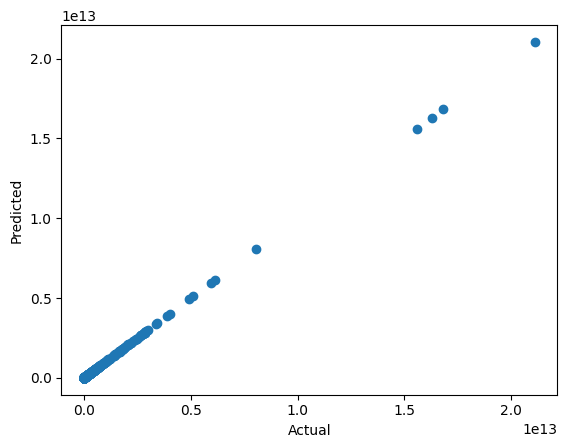

In [16]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

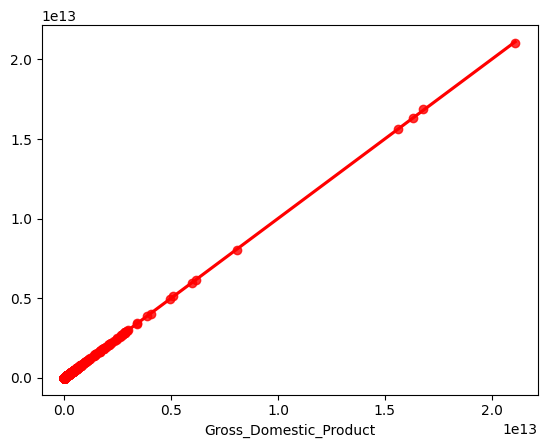

In [17]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

## Difference between actual and predicted value

In [18]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
3434,2.500000e+11,2.428031e+11,7.196868e+09
5515,2.558623e+10,2.631829e+10,-7.320599e+08
33,4.729042e+09,4.912368e+09,-1.833254e+08
2319,2.402966e+10,2.426571e+10,-2.360462e+08
2900,7.963476e+09,7.950977e+09,1.249889e+07
...,...,...,...
1513,4.664899e+09,4.535241e+09,1.296587e+08
8995,7.542351e+08,7.956582e+08,-4.142307e+07
5264,1.155000e+09,1.083132e+09,7.186816e+07
9977,1.090000e+12,1.141675e+12,-5.167548e+10
